In [1]:
# It's time to find the possible fraudulent posts
# With limited data, we'll take a strategy of signaling the posts
# that are too cheap for a given location and a given type
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
!ls

data_fetch.ipynb  fraud_find.ipynb  house_data.csv  page.html


In [3]:
data = pd.read_csv('house_data.csv', index_col=0)
data

,price,type,size,link,municipality,district
index,,,,,,
0,950,2,55.00,https://www.imovirtual.com/pt/anuncio/apartame...,Misericórdia,Lisboa
1,1300,3,105.00,https://www.imovirtual.com/pt/anuncio/apartame...,Olivais,Lisboa
2,690,1,45.80,https://www.imovirtual.com/pt/anuncio/apartame...,São Nicolau e Vitória,Porto
3,1900,2,118.79,https://www.imovirtual.com/pt/anuncio/apartame...,Misericórdia,Lisboa
4,1200,1,58.00,https://www.imovirtual.com/pt/anuncio/apartame...,São Vicente,Lisboa
...,...,...,...,...,...,...
11995,950,1,60.00,https://www.imovirtual.com/pt/anuncio/apartame...,Areeiro,Lisboa
11996,1250,2,90.00,https://www.imovirtual.com/pt/anuncio/arrenda-...,Parque das Nações,Lisboa
11997,470,1,45.00,https://www.imovirtual.com/pt/anuncio/apartame...,Santo António dos Olivais,Coimbra


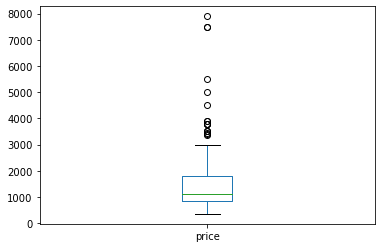

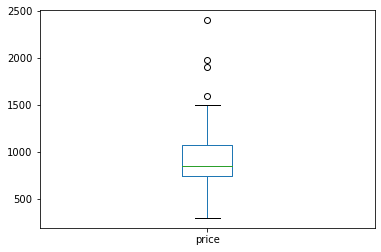

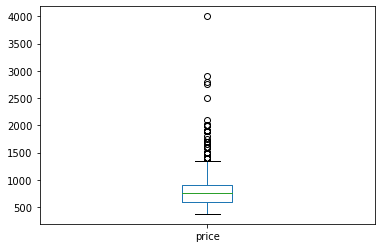

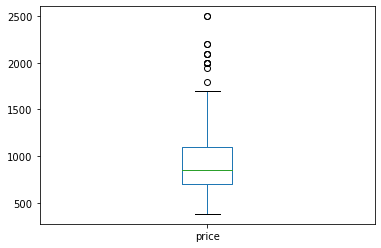

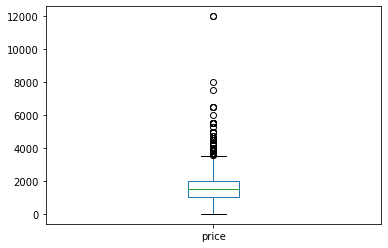

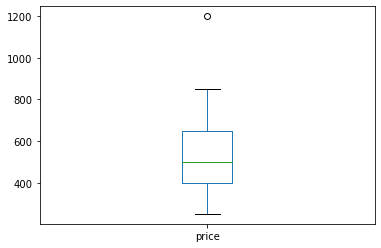

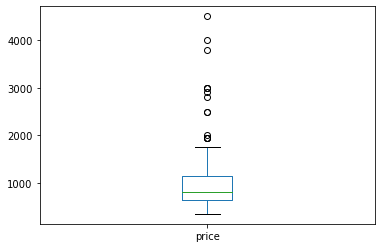

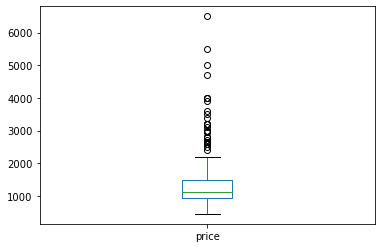

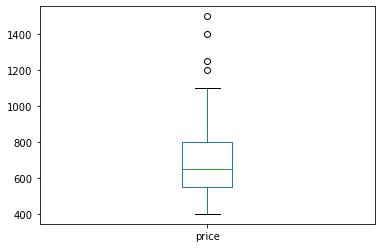

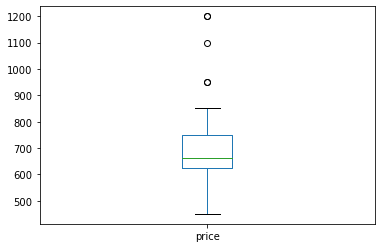

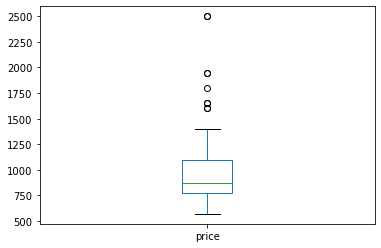

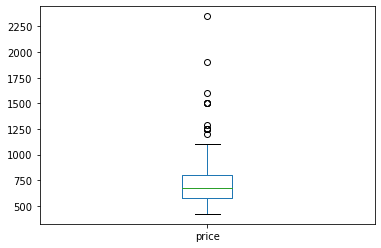

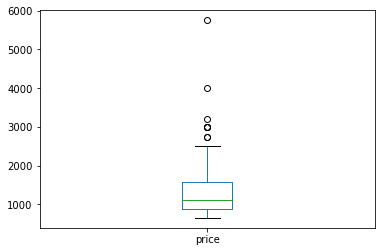

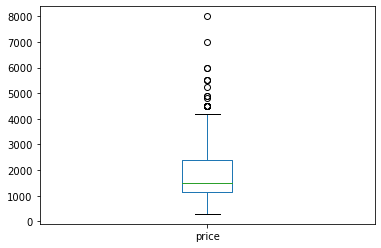

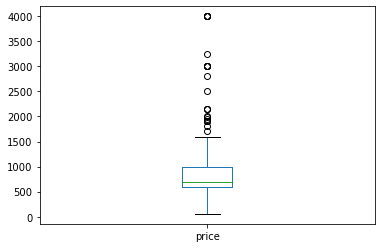

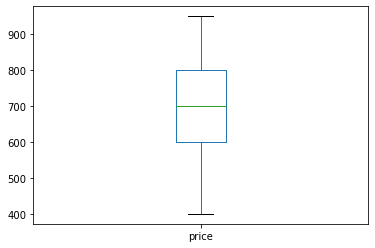

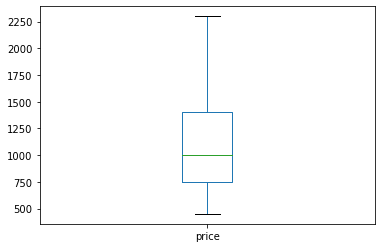

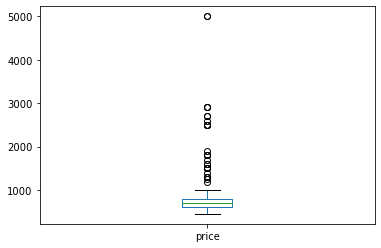

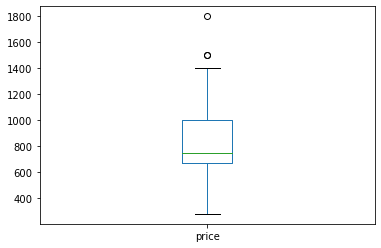

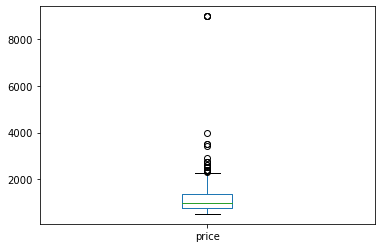

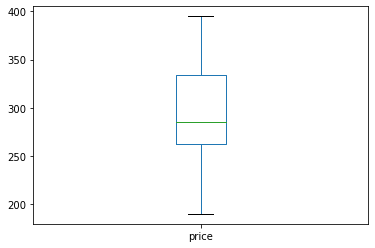

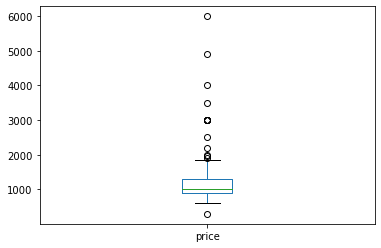

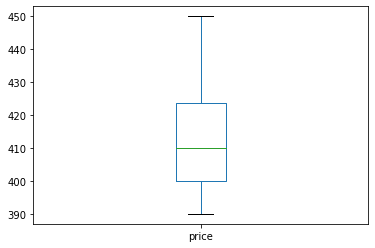

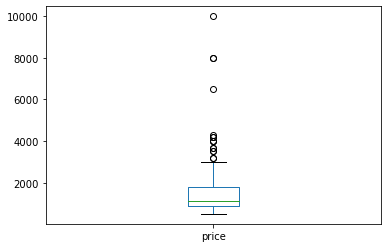

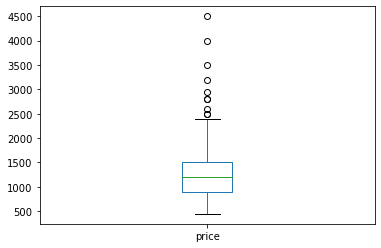

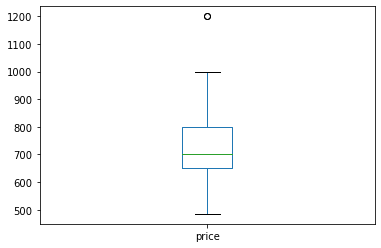

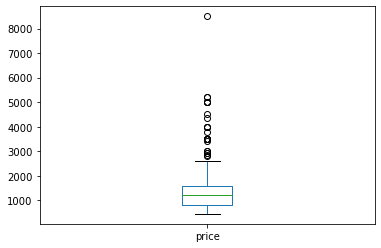

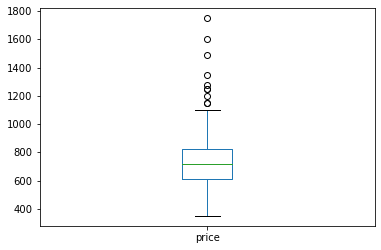

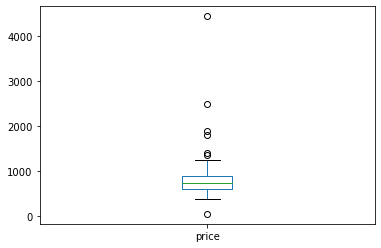

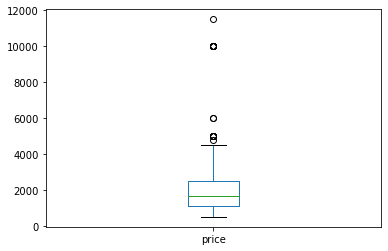

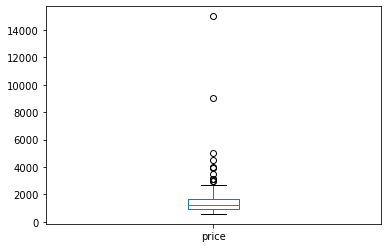

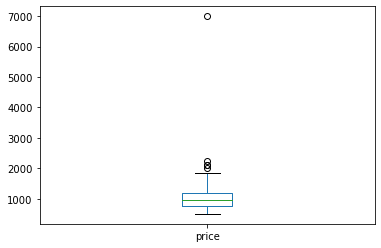

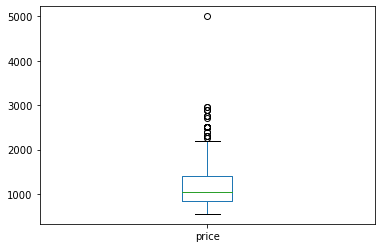

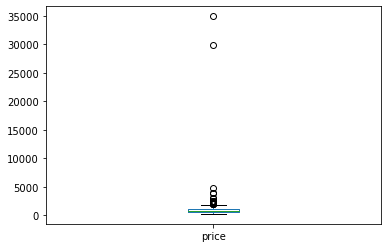

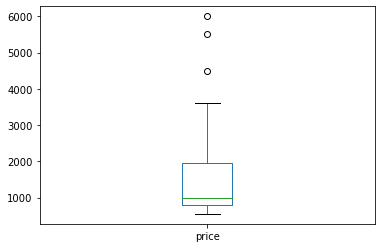

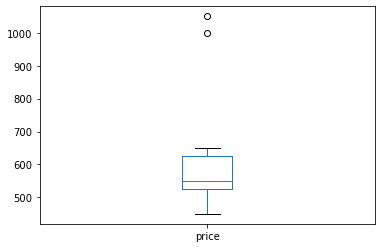

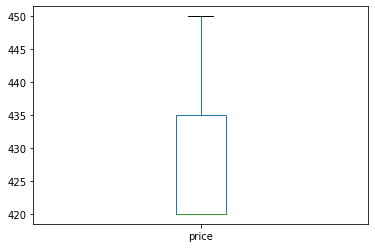

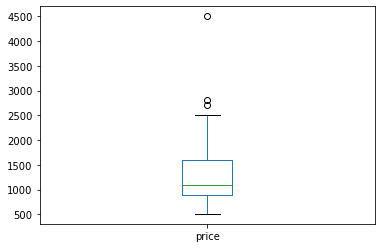

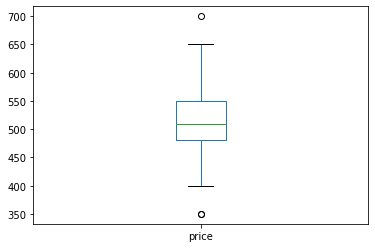

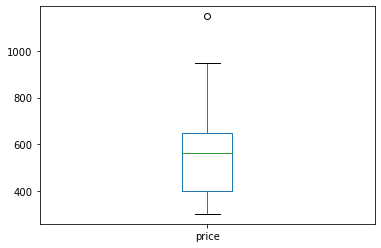

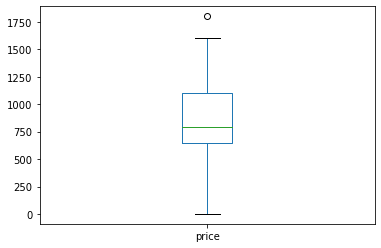

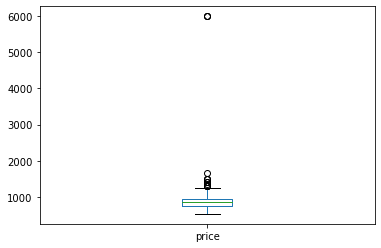

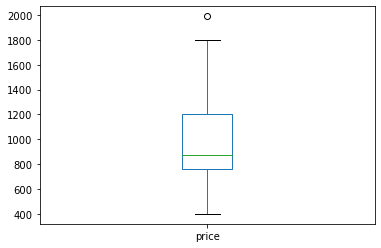

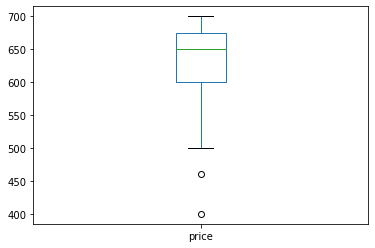

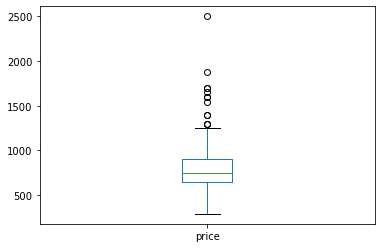

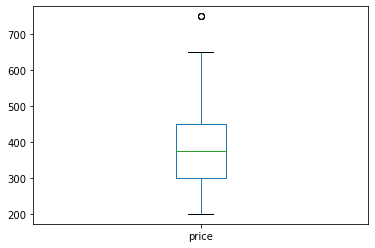

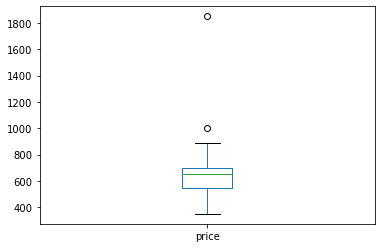

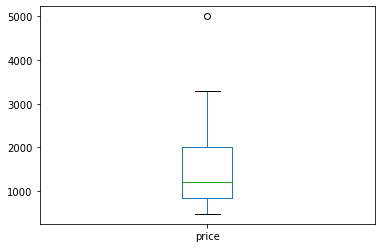

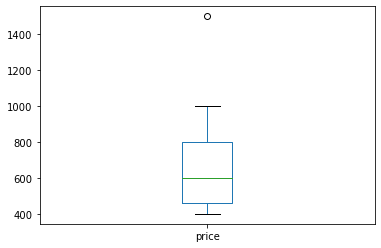

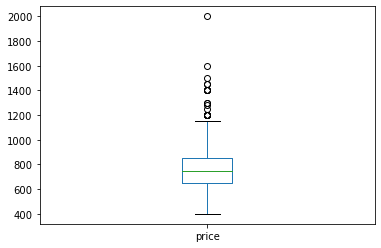

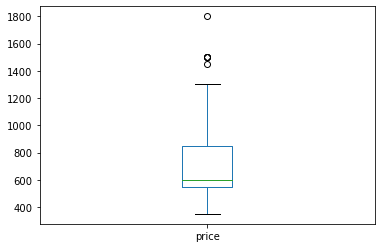

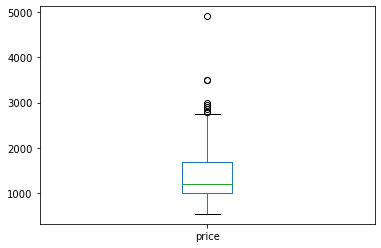

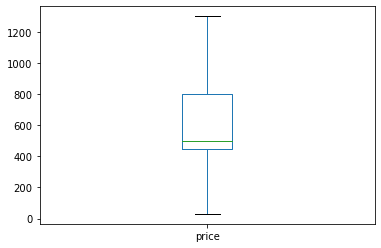

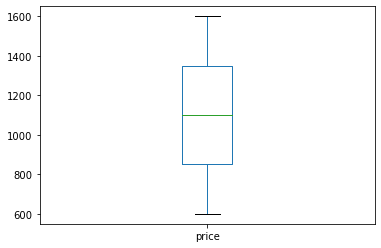

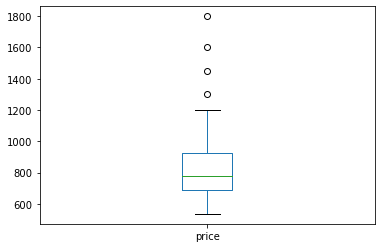

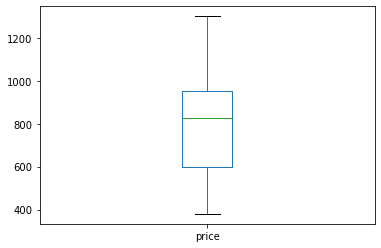

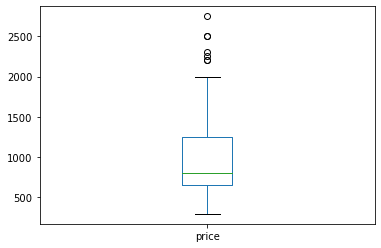

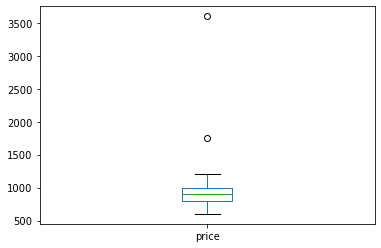

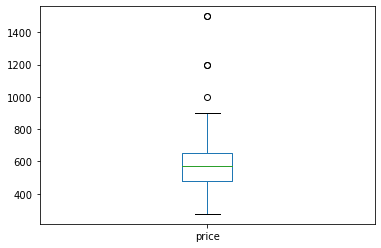

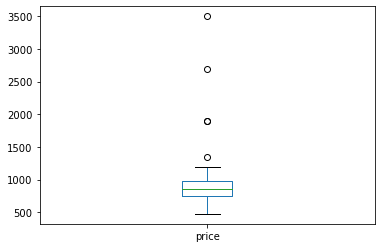

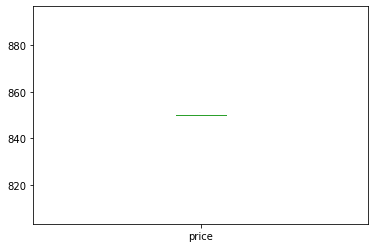

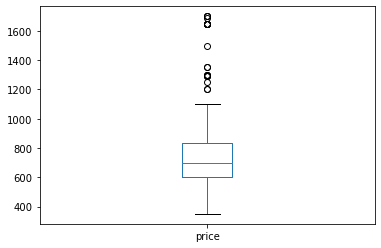

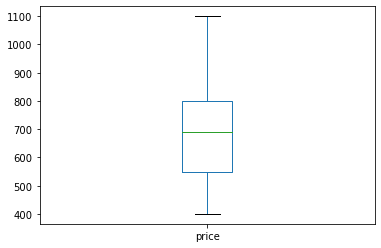

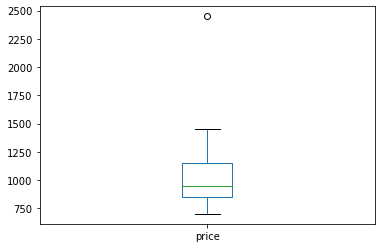

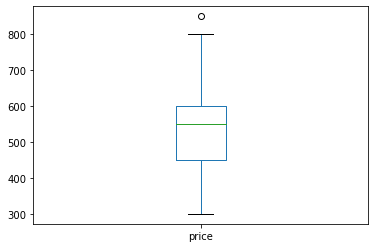

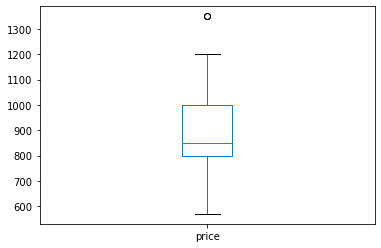

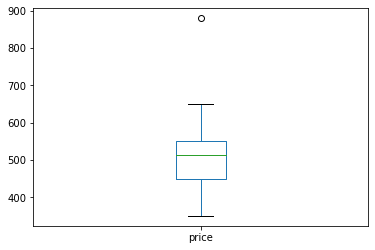

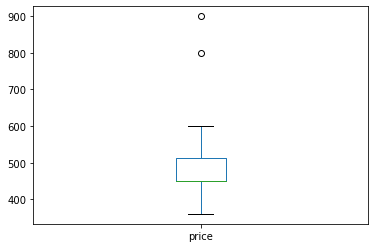

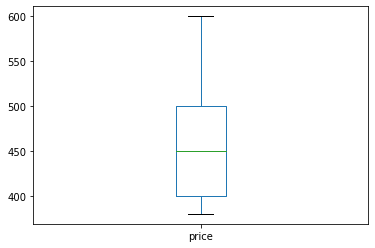

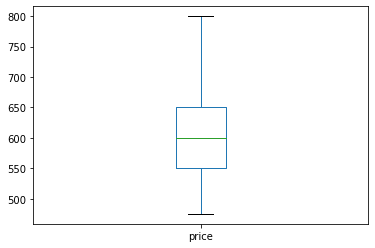

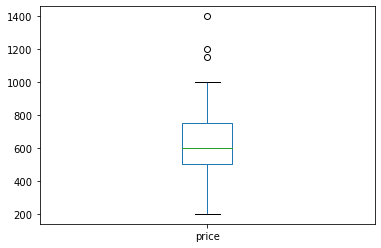

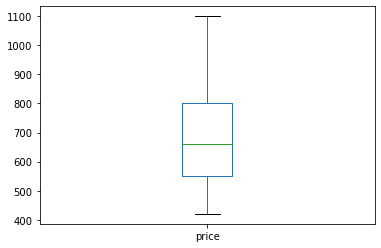

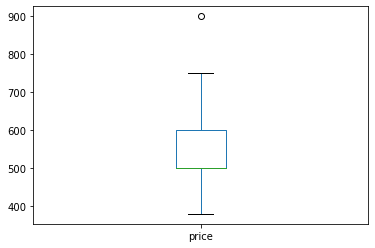

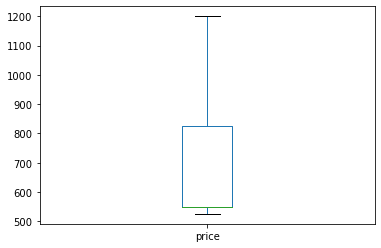

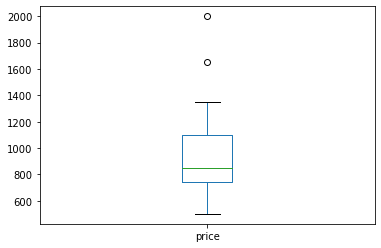

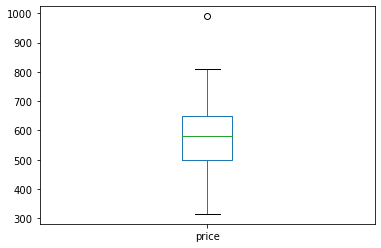

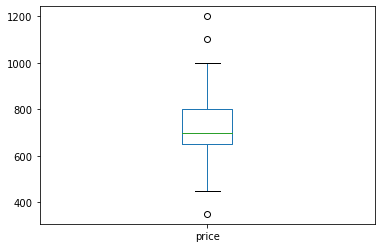

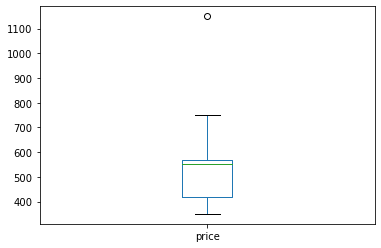

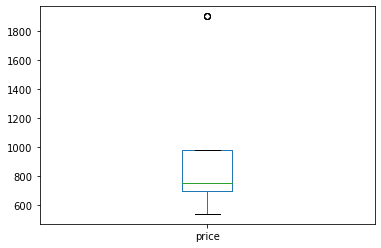

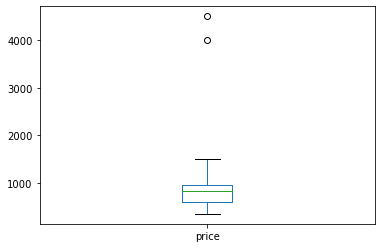

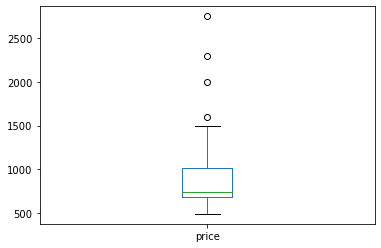

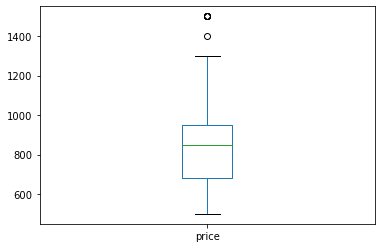

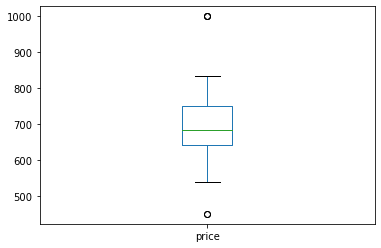

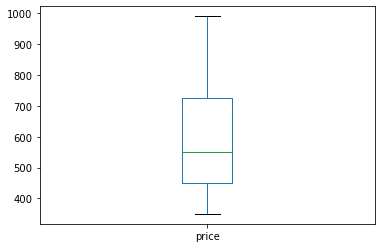

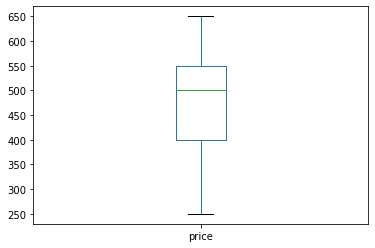

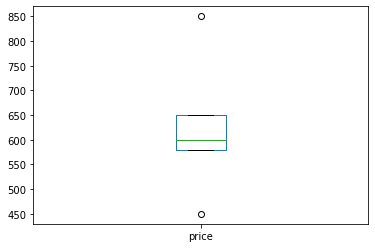

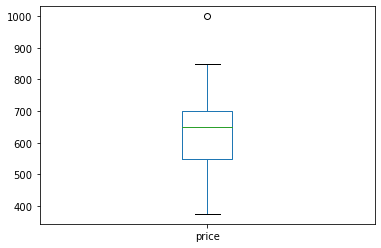

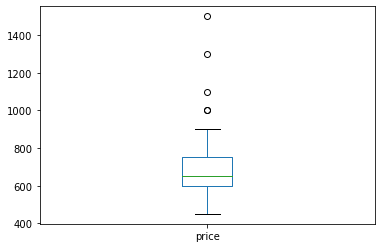

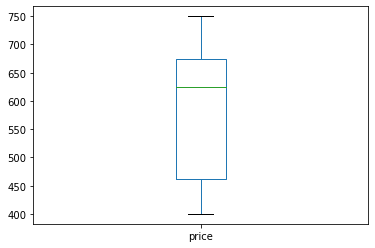

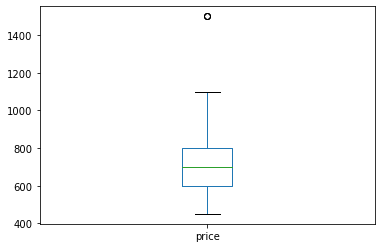

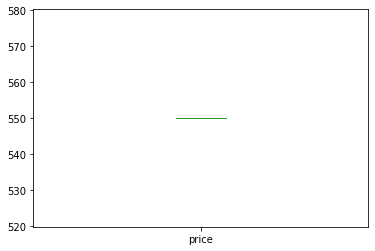

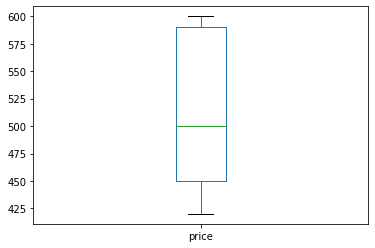

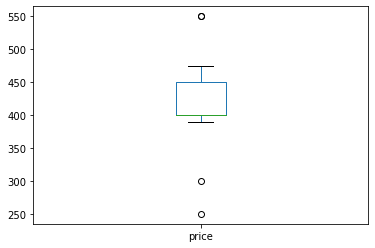

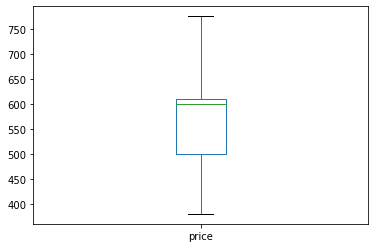

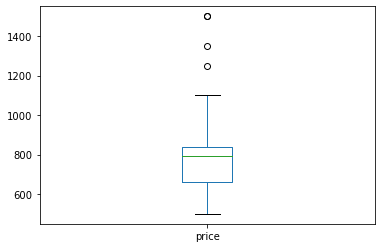

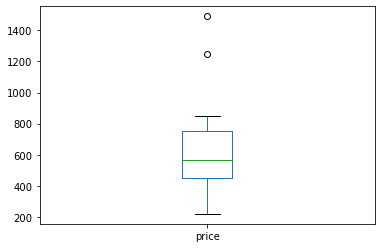

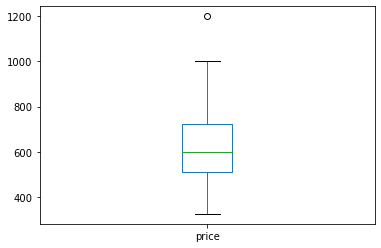

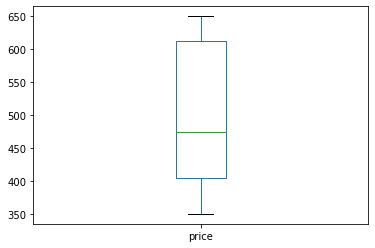

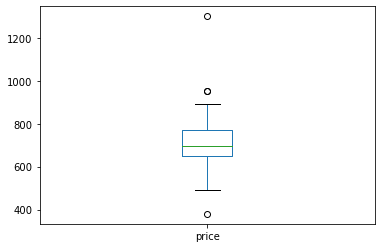

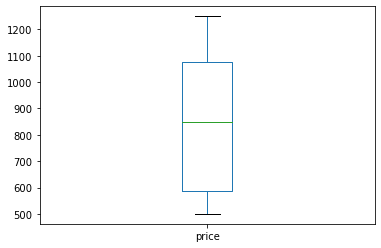

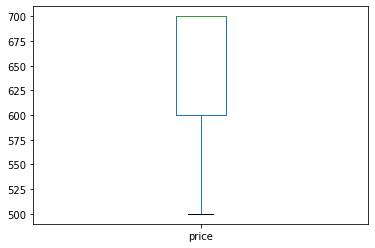

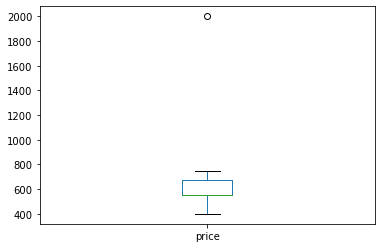

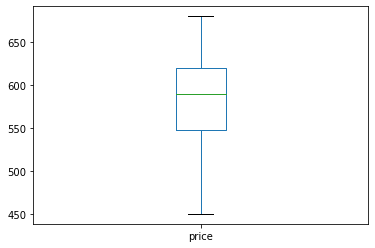

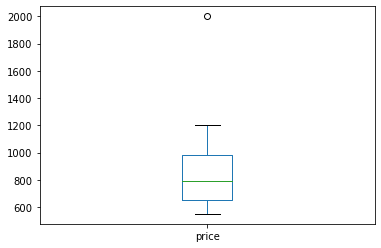

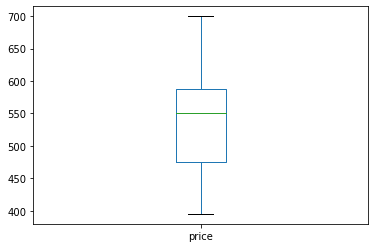

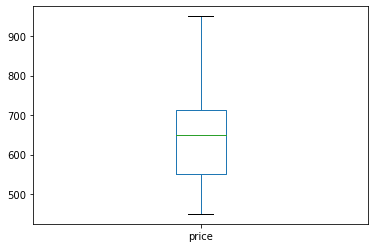

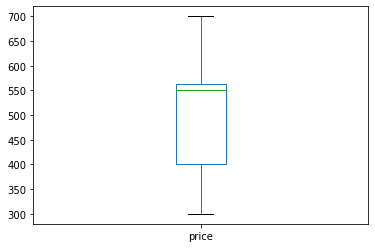

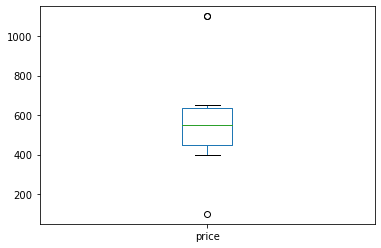

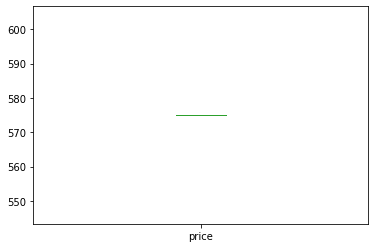

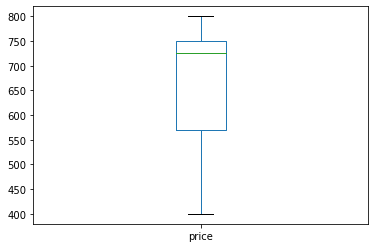

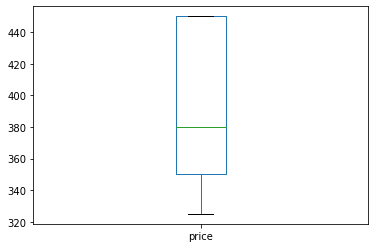

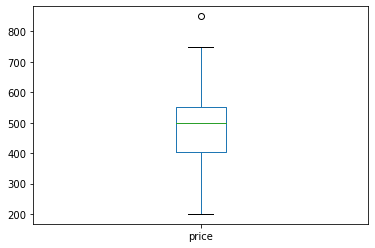

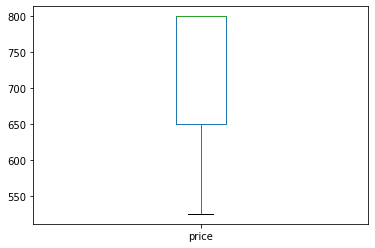

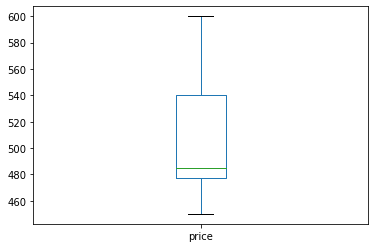

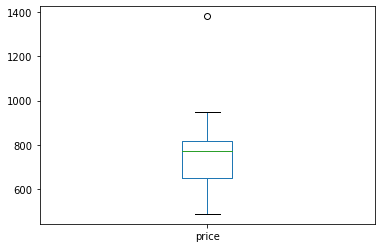

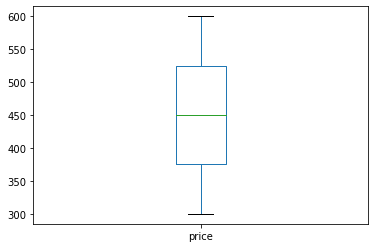

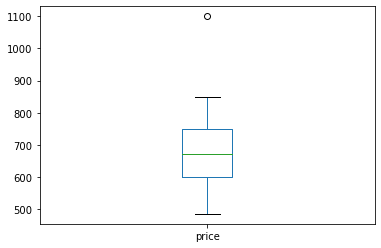

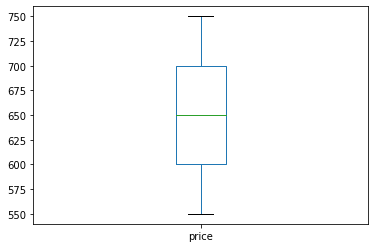

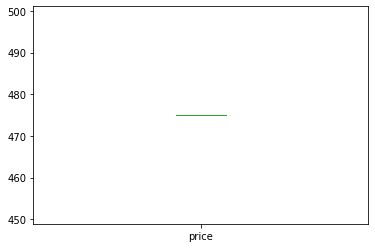

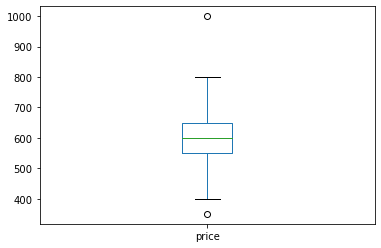

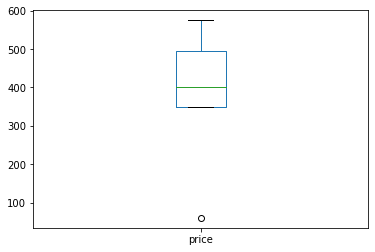

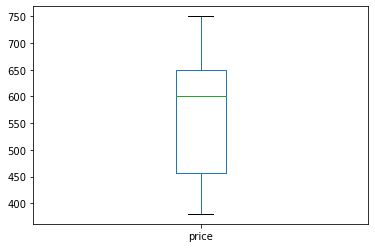

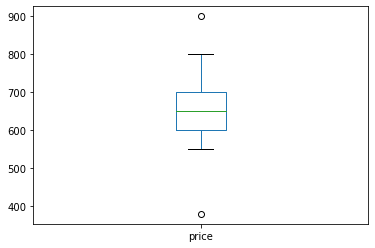

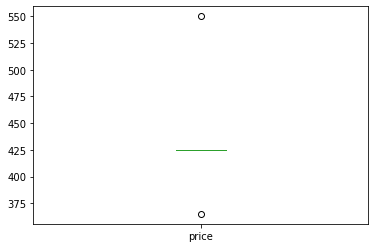

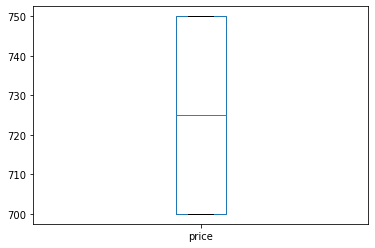

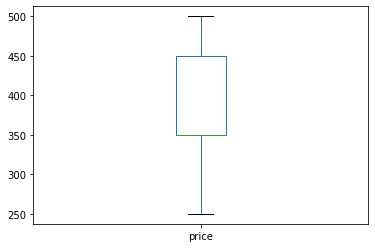

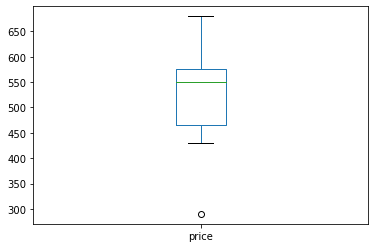

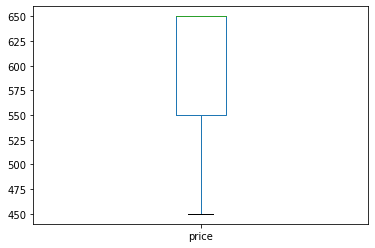

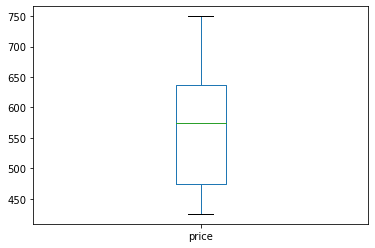

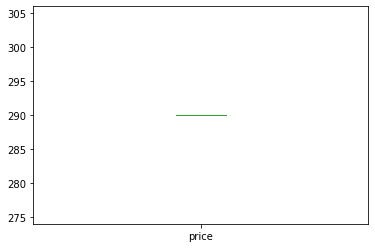

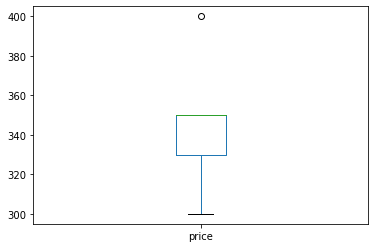

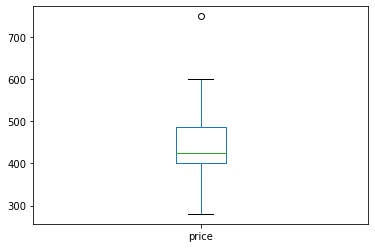

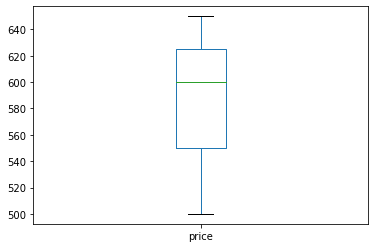

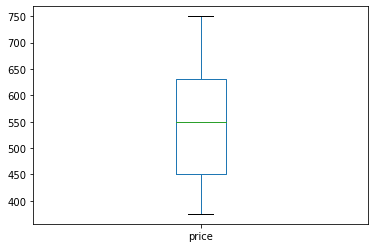

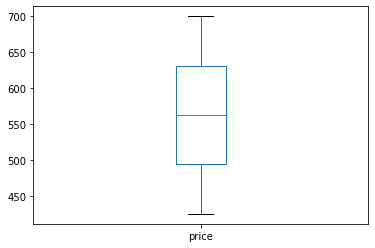

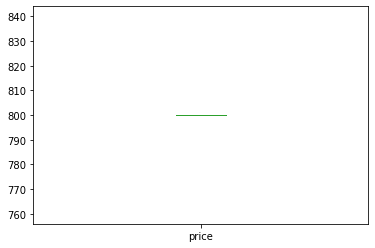

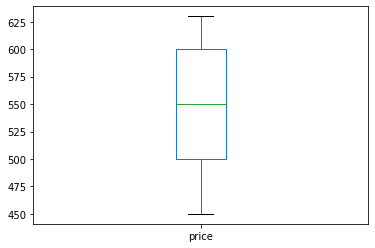

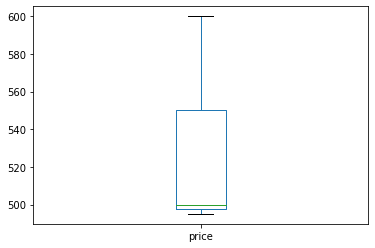

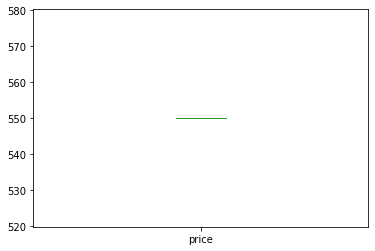

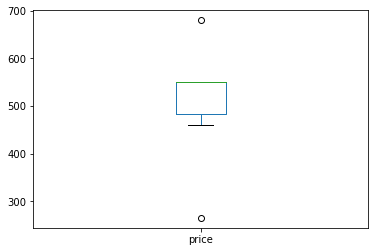

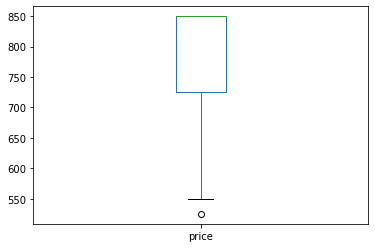

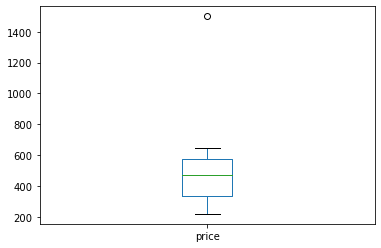

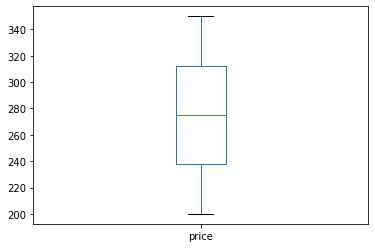

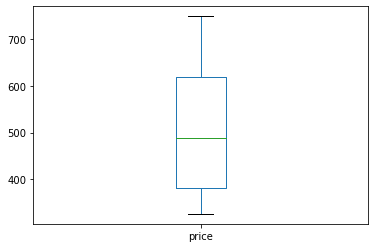

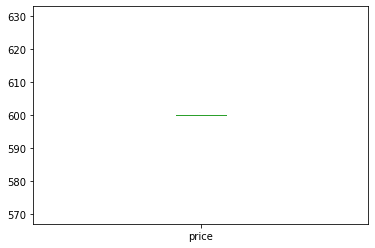

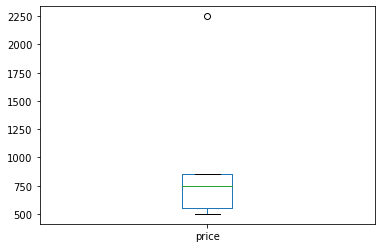

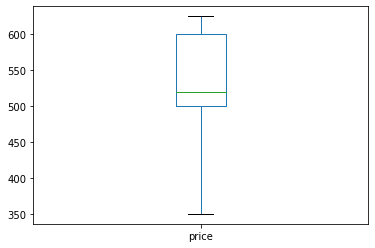

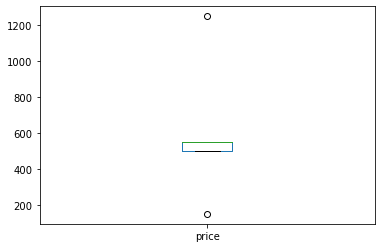

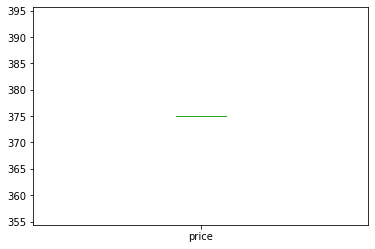

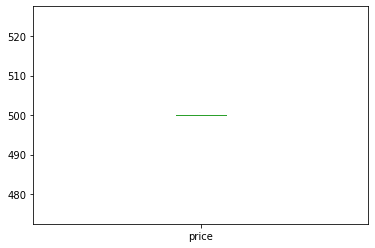

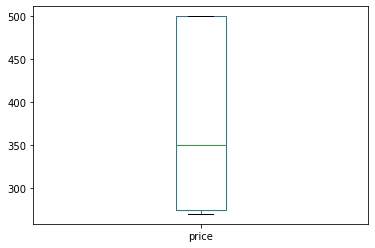

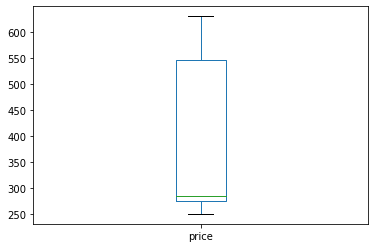

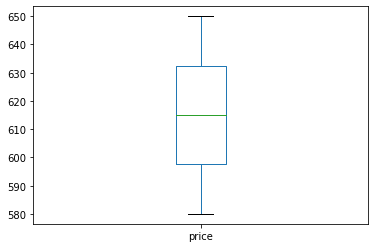

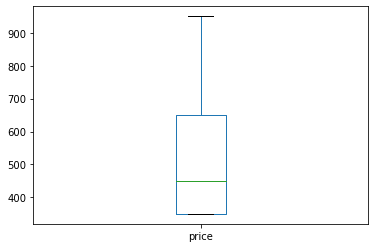

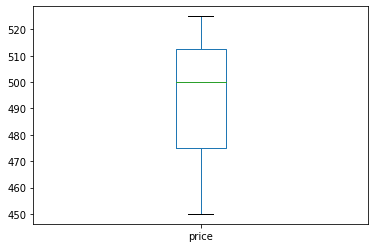

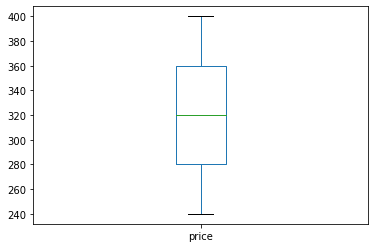

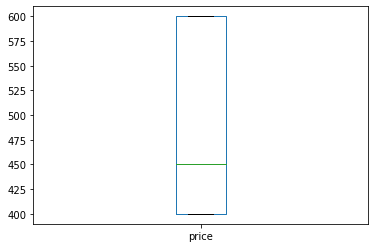

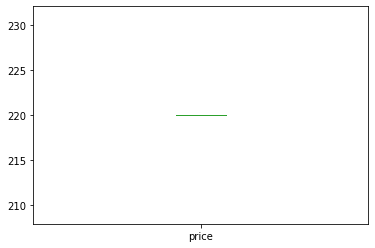

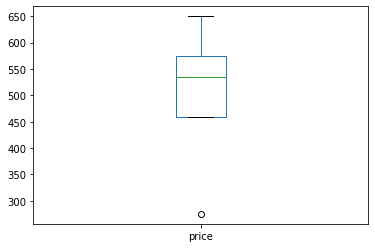

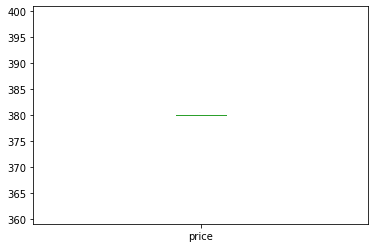

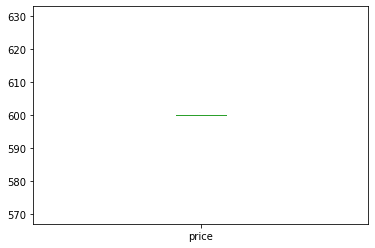

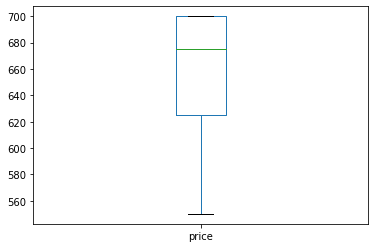

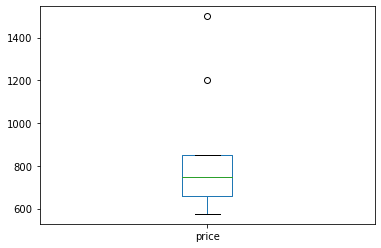

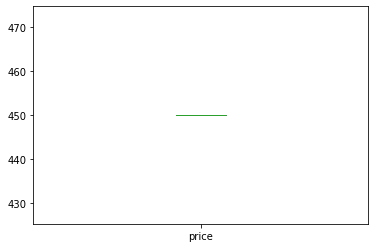

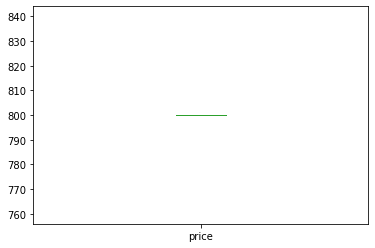

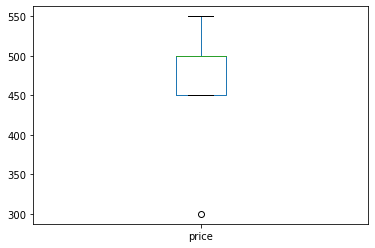

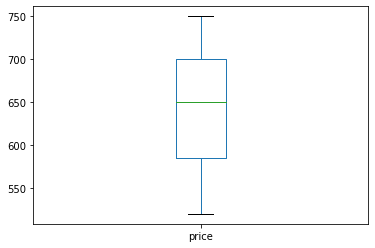

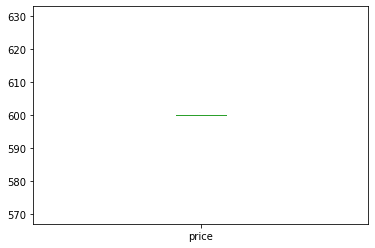

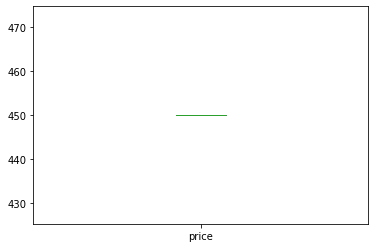

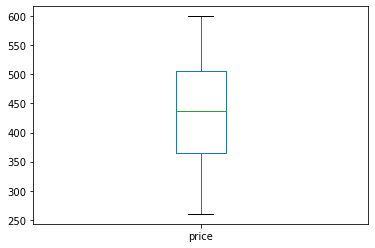

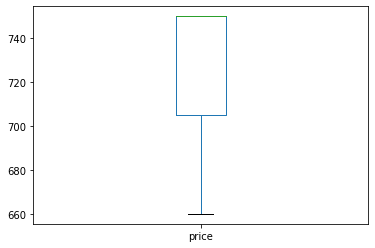

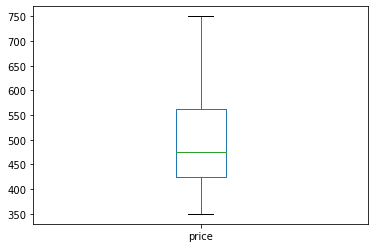

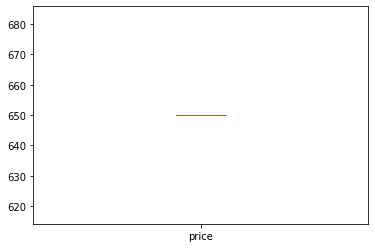

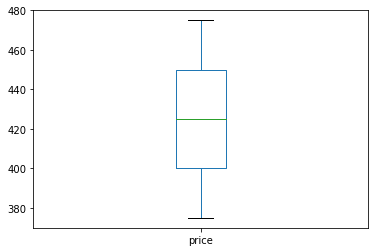

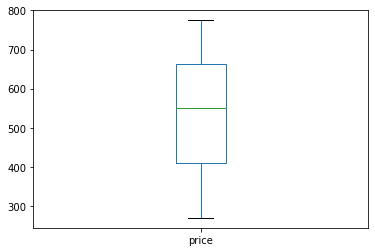

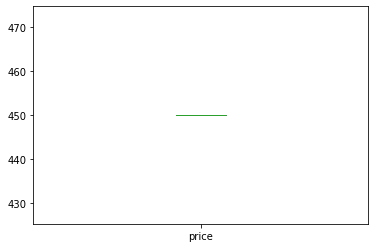

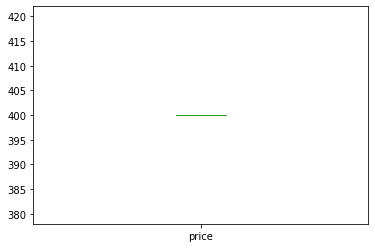

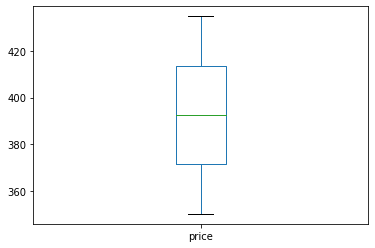

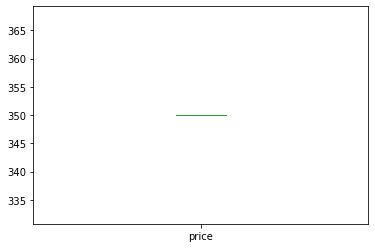

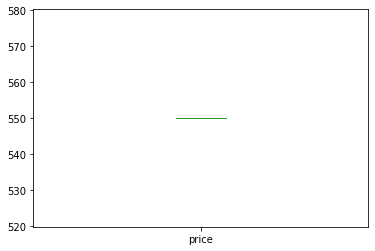

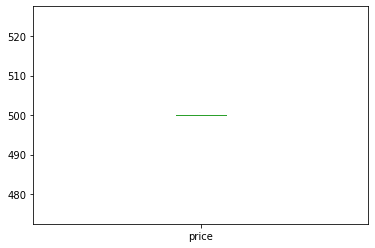

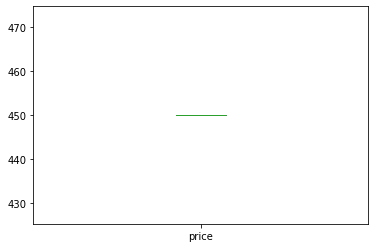

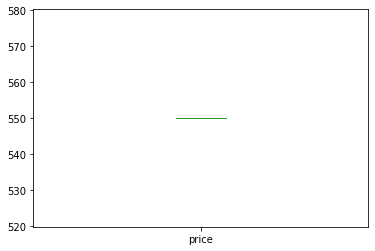

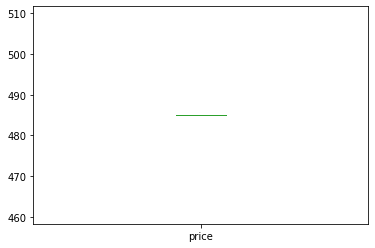

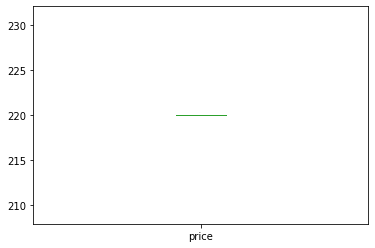

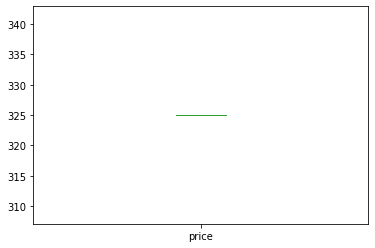

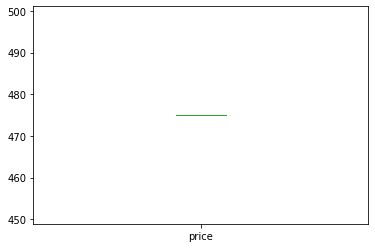

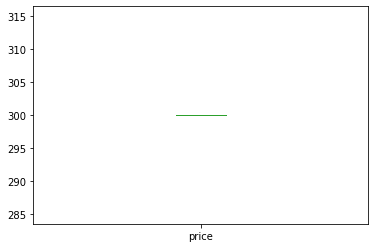

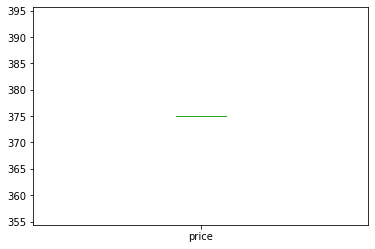

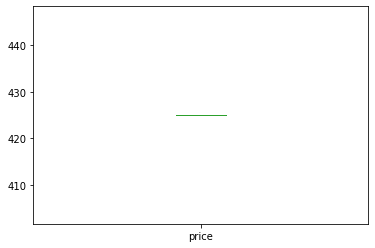

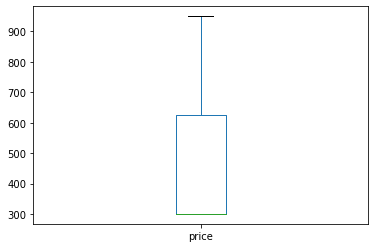

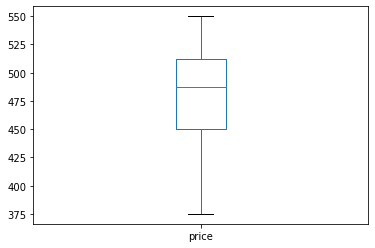

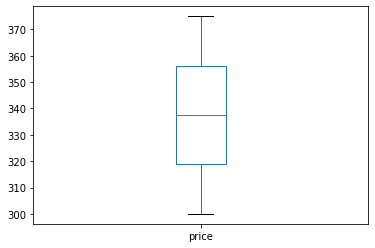

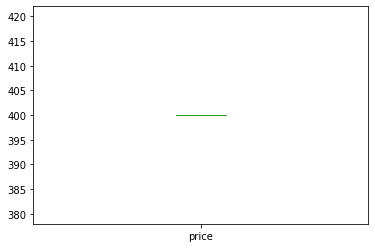

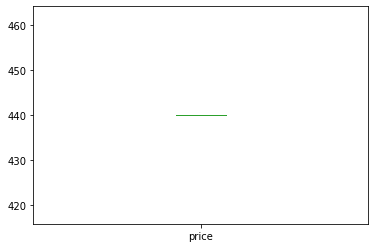

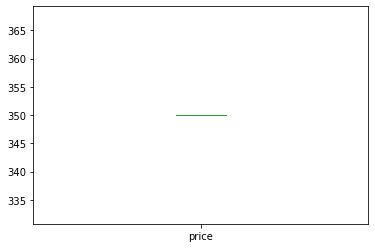

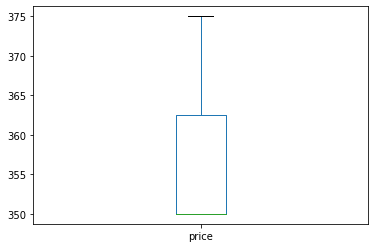

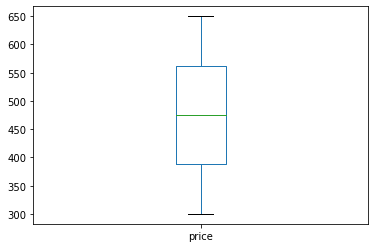

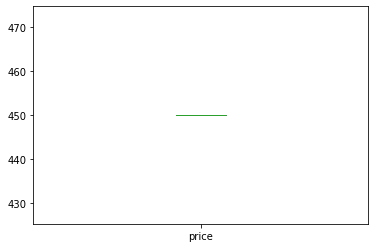

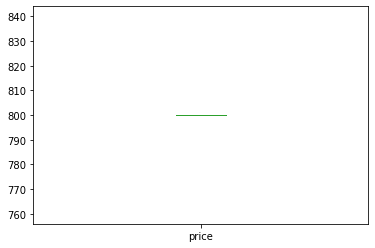

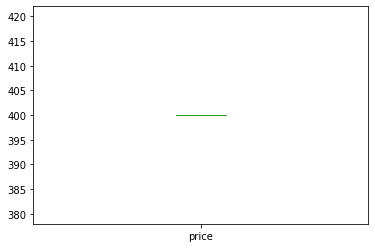

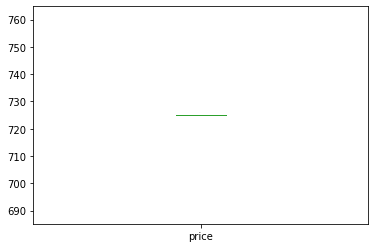

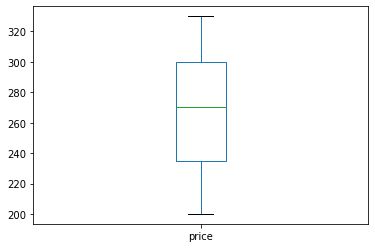

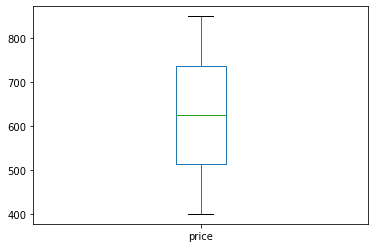

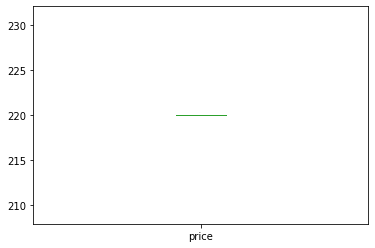

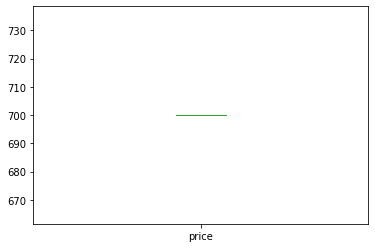

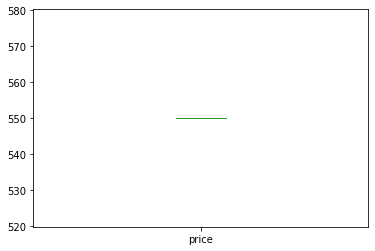

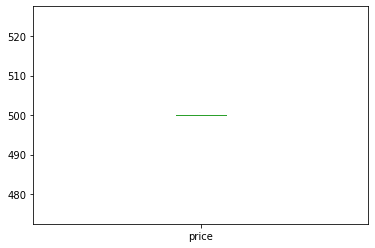

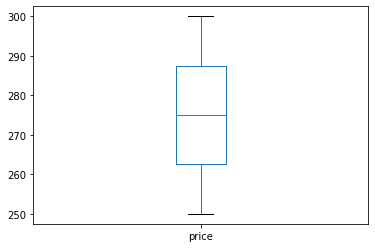

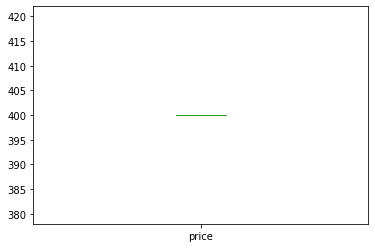

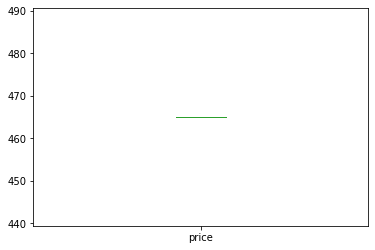

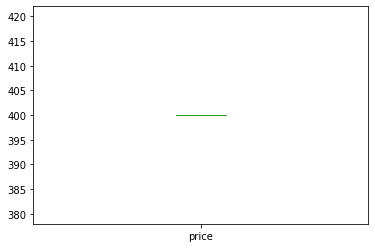

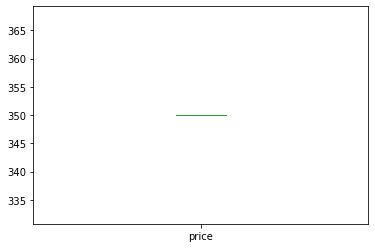

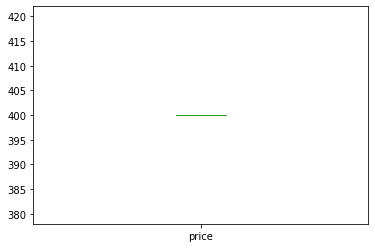

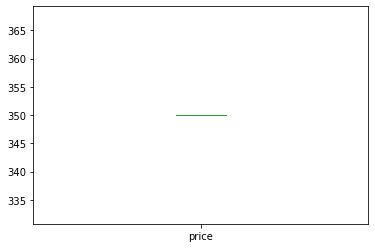

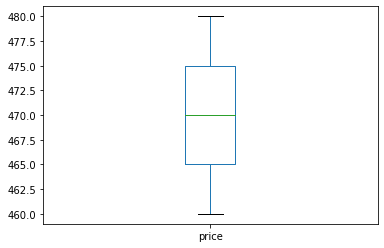

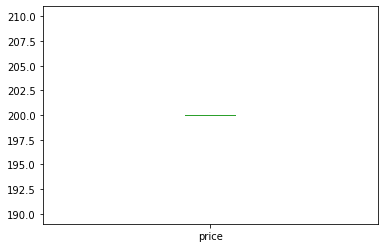

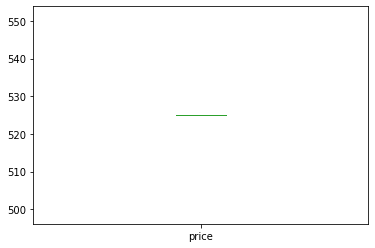

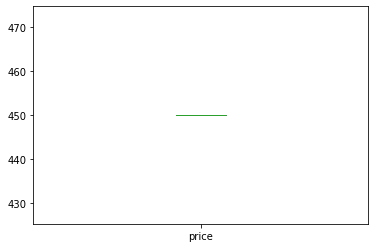

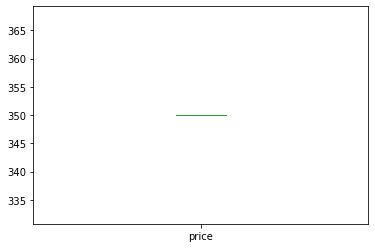

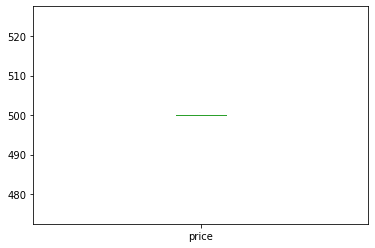

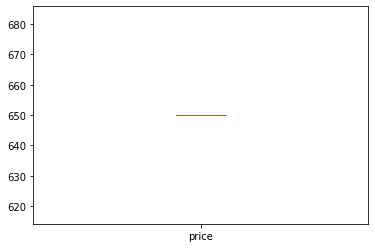

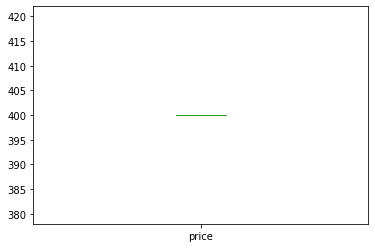

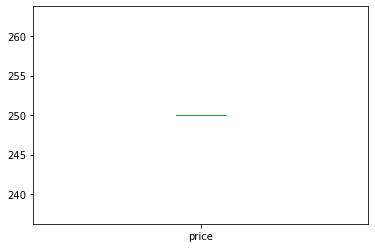

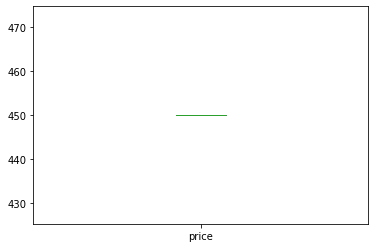

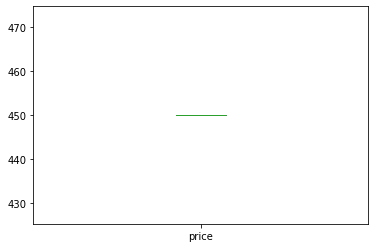

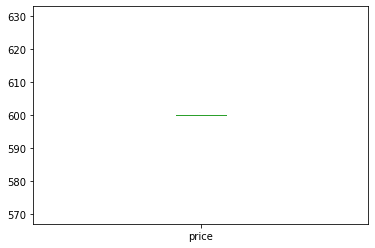

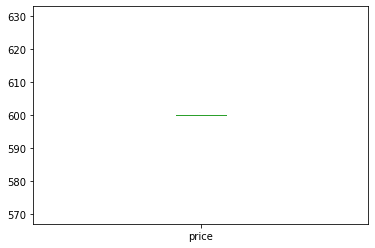

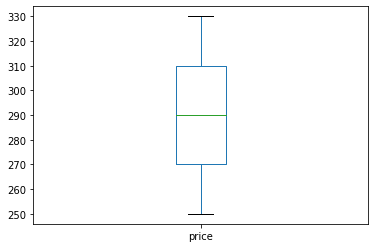

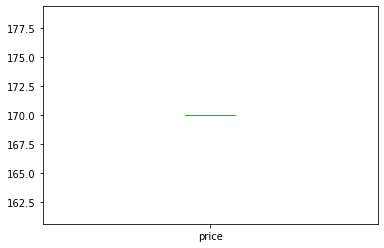

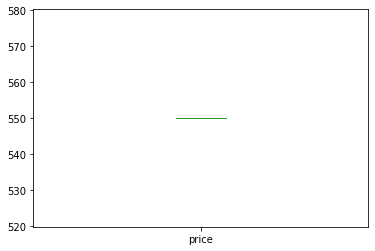

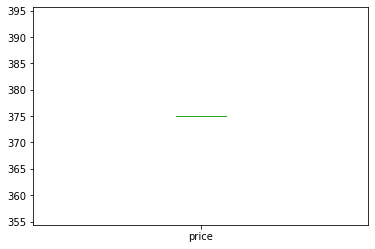

In [9]:
for mun in data.municipality.unique():
    data[(data.municipality == mun) & (data.price < 96000) & (data.size > 0)].boxplot(column='price', grid=False)
    plt.show()

In [12]:
from scipy import stats
z = np.abs(stats.zscore(data.price))
print(data.index[z > 30])

Int64Index([1673, 4550, 4834, 6610, 11680], dtype='int64', name='index')


In [6]:
print(np.where(z > 3))

(array([ 1669,  2583,  2605,  3245,  4513,  4793,  5469,  6555,  6637,
       10347, 10743, 11201, 11578, 11734]),)


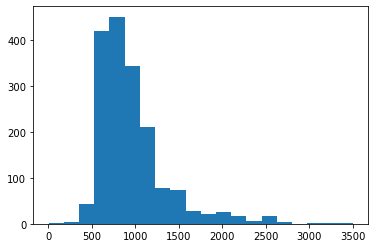

In [14]:

data.price[(data.district == 'Lisboa') & (data.type == 1) & (data.price>0)].hist(bins=20, grid=False)
plt.show()

In [ ]:
for mun in data.municipality.unique():
    price_list = []
    index_house = []
    
    for t in data.type.unique():
        price_list.append(data.price[ (data.municipality == mun) & (data.type == type) ])
        
    z = np.abs(stats.zscore(price_list))
        
         
        
    plt.boxplot(price_list)
    plt.show()              